In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_tran = pd.read_csv('train_transaction.csv',encoding='Latin-1')
train_id = pd.read_csv('train_identity.csv',encoding='Latin-1')

In [3]:
train_tran

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train_id

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [5]:
train_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

In [6]:
train_tran['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [7]:
train_tran['card4'].value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

In [3]:
train_merge = pd.merge(train_tran, train_id, on='TransactionID', how='outer')

In [9]:
train_merge['card4'].value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

In [4]:
del train_tran, train_id

In [4]:
train_merge

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
isFraud = train_merge[['isFraud']]


In [7]:
card4 = train_merge[['card4','isFraud']]

In [8]:
sad = card4.groupby('card4').isFraud.sum()

In [9]:
card4['total']=1

In [10]:
card4 = card4.groupby(['card4']).sum()[['isFraud','total']]

In [11]:
card4['total'] = card4['total'] - card4['isFraud']


In [12]:
card4.rename(columns={'total': 'noFraud'}, inplace=True)

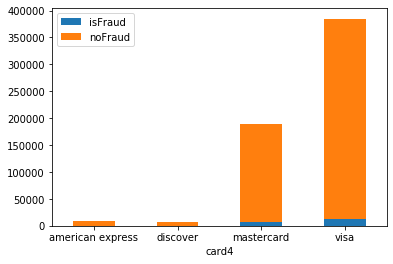

In [13]:
ax = card4.plot.bar(rot=0,stacked=True)

Text(0.5, 1.0, 'Cantidad de transacciones por cada tarjeta')

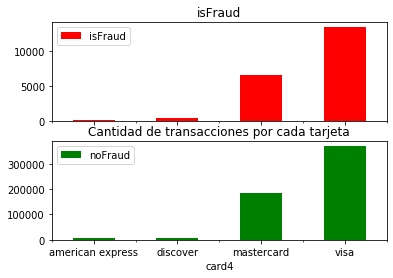

In [15]:
axes = card4.plot.bar(rot=0, subplots=True, color={'r','g'})
axes[1].legend(loc=2)
plt.title("Cantidad de transacciones por cada tarjeta")

In [16]:
train_merge['card6'].value_counts()

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

In [17]:
card6 = train_merge[['card6','isFraud']]

In [18]:
card6['total']=1
card6 = card6.groupby(['card6']).sum()[['isFraud','total']]
card6['total'] = card6['total'] - card6['isFraud']
card6.rename(columns={'total': 'noFraud'}, inplace=True)

In [19]:
card6

,isFraud,noFraud
card6,,
charge card,0,15
credit,9950,139036
debit,10674,429264
debit or credit,0,30


Text(0.5, 1.0, 'Cantidad de fraudes por tipo de tarjetas')

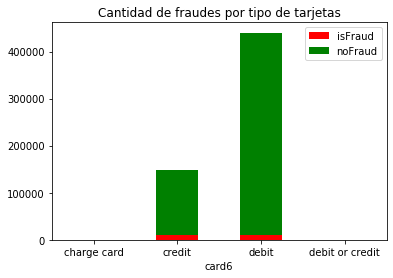

In [20]:
ax = card6.plot.bar(rot=0,stacked=True, color={'r','g'})
plt.title("Cantidad de fraudes por tipo de tarjetas")

Text(0, 0.5, 'Cant')

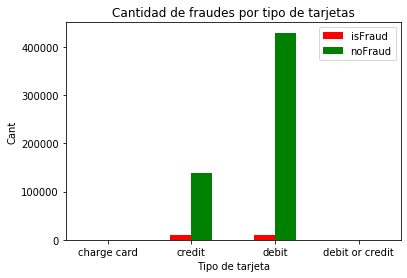

In [36]:
axes = card6.plot.bar(rot=0, subplots=False, color={'r','g'})
plt.title("Cantidad de fraudes por tipo de tarjetas")
plt.xlabel("Tipo de tarjeta")
plt.ylabel("Cant")

In [22]:
prueba = train_merge[['isFraud','TransactionAmt','TransactionDT']]

In [23]:
prueba1=prueba.groupby(['isFraud']).mean()

In [24]:
prueba1

,TransactionAmt,TransactionDT
isFraud,,
0,134.511665,7.360791e+06
1,149.244779,7.690033e+06


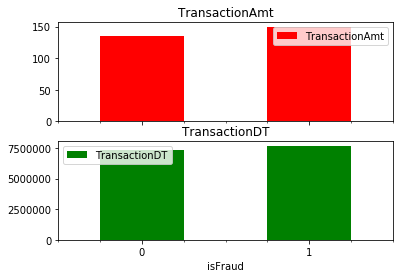

In [31]:
axes = prueba1.plot.bar(rot=0, subplots=True, color={'r','g'})
axes[1].legend(loc=2)
plt.title("Cantidad de fraudes por tipo de tarjetas")

In [25]:
device = train_merge[['DeviceType','isFraud']]

In [26]:
#device['total']=1
#device=device.groupby(['DeviceType']).sum()
#device['total']=device['total']-device['isFraud']
device

,DeviceType,isFraud
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,mobile,0
...,...,...
590535,NaN,0
590536,NaN,0
590537,NaN,0
590538,NaN,0


In [27]:
device['DeviceType'].isna().sum()

449730

In [28]:
device['DeviceType'].value_counts()

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

In [29]:
device2=train_merge[['DeviceInfo','isFraud']]

In [30]:
a=device2.groupby(['DeviceInfo']).sum().sort_values(by='isFraud',ascending=False)

Text(0, 0.5, 'Cant')

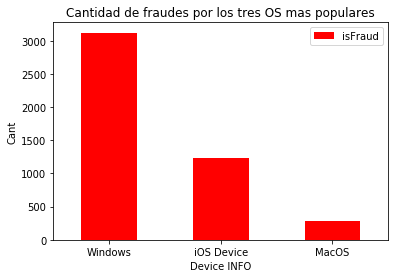

In [37]:
ax = a.loc[a['isFraud']>180].plot.bar(rot=0, color={'r'})
plt.title("Cantidad de fraudes por los tres OS mas populares")
plt.xlabel("Device INFO")
plt.ylabel("Cant")

In [38]:
id_31 = train_merge[['id_31','isFraud']]

In [39]:
b=id_31.groupby(['id_31']).sum().sort_values(by='isFraud',ascending=False)

In [40]:
b.index.names = ['Navegador usado']
b

,isFraud
Navegador usado,
chrome 63.0,1503
mobile safari generic,1146
mobile safari 11.0,842
chrome generic,803
chrome 65.0,679
...,...
firefox mobile 61.0,0
google search application 48.0,0
google search application 49.0,0


Text(0, 0.5, 'Cantidad')

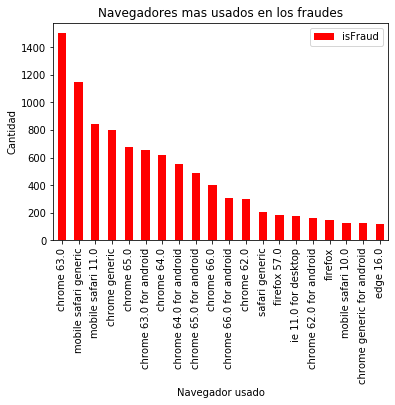

In [41]:
ax = b.loc[b['isFraud']>100].plot.bar(rot=90, color={'r'})
plt.title("Navegadores mas usados en los fraudes")
plt.ylabel("Cantidad")

In [42]:
datetime = train_merge[['TransactionDT','isFraud']]

In [43]:
datetime=datetime.loc[datetime.isFraud==1]

In [44]:
datetime=datetime.groupby(['TransactionDT']).sum().sort_values(by='isFraud',ascending=False)

In [45]:
datetime.reset_index().groupby(['isFraud']).mean()

,TransactionDT
isFraud,
1,7.689788e+06
2,7.833059e+06
3,7.155264e+06
4,8.468062e+06


Text(0.5, 1.0, 'Datetime de las transacciones cuando es fraude')

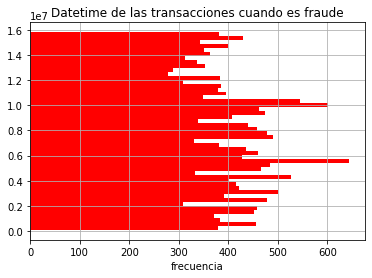

In [46]:
datetime.reset_index().hist(column='TransactionDT',bins=50,sharex=False,color='red',
                           orientation='horizontal')
plt.xlabel('frecuencia')
plt.title('Datetime de las transacciones cuando es fraude')

In [47]:
def column_properties(df):
    columns_prop = pd.DataFrame()
    #we are creating a list and putting all the columns in the list
    columns_prop['column'] = df.columns.tolist()
    
    #we are counting the rows which have no null values for the particular column
    columns_prop['count_non_null'] = df.count().values
    
    #we are looking at all the null values and adding it to count non null
    columns_prop['count_null'] = df.isnull().sum().values
    columns_prop['perc_null'] = columns_prop['count_null'] * 100 / df.shape[0]

    #using df.nunique() is memory intensive and slow resulting in kernal death
    unique_list = []
    
    #for each column in the list we created above
    for col in df.columns.tolist():
        unique_list.append(df[col].value_counts().shape[0])
    
    #coutning the number of unique values in each column
    columns_prop['count_unique'] =  unique_list
    
    #printing the data type for each column
    columns_prop['dtype'] = df.dtypes.values
    columns_prop.set_index('column', inplace = True)
    return columns_prop

In [48]:
column_properties(train_tran).transpose()

NameError: name 'train_tran' is not defined

In [49]:
product = train_merge[['ProductCD','isFraud',]]

In [50]:
product.loc[product.isFraud==1]

,ProductCD,isFraud
203,W,1
240,C,1
243,C,1
245,C,1
288,C,1
...,...,...
590361,W,1
590364,C,1
590368,H,1
590372,W,1


In [51]:
product.groupby(['isFraud']).mean().boxplot()

DataError: No numeric types to aggregate

In [53]:
product.ProductCD.value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

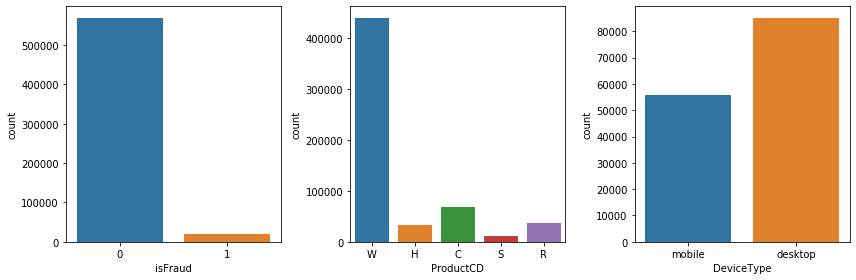

In [6]:
f, axes = plt.subplots(1, 3, figsize=(12, 4))
isFraud = sns.countplot(x='isFraud', data=train_merge, ax=axes[0])
ProductCD = sns.countplot(x='ProductCD', data=train_merge, ax=axes[1])
DeviceType = sns.countplot(x='DeviceType', data=train_merge, ax=axes[2])
plt.tight_layout()

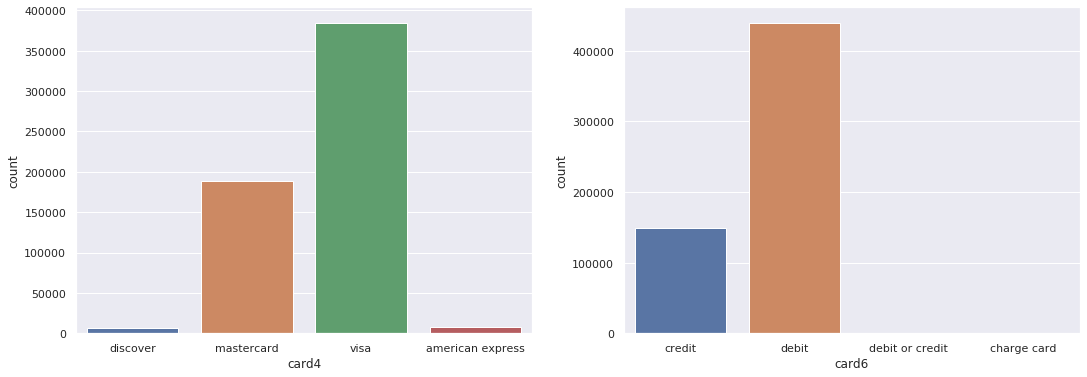

In [8]:
f, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.set(color_codes=True)
card4 = sns.countplot(x='card4', data=train_merge, ax=axes[0])
card6 = sns.countplot(x='card6', data=train_merge, ax=axes[1])

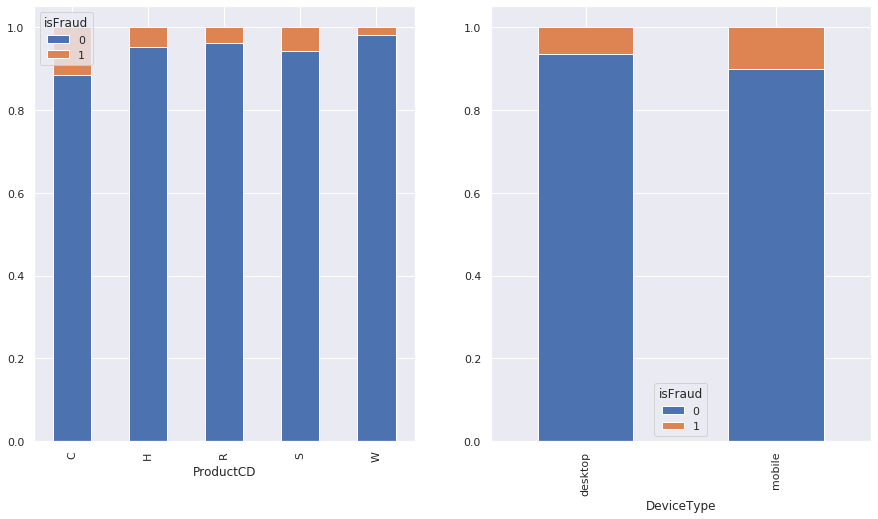

In [9]:
f, axes = plt.subplots(1, 2, figsize=(15, 8))

props = train_merge.groupby("ProductCD")['isFraud'].value_counts(normalize=True).unstack()
p = props.plot(kind='bar', stacked='True', ax=axes[0])

props = train_merge.groupby("DeviceType")['isFraud'].value_counts(normalize=True).unstack()
p = props.plot(kind='bar', stacked='True', ax=axes[1])

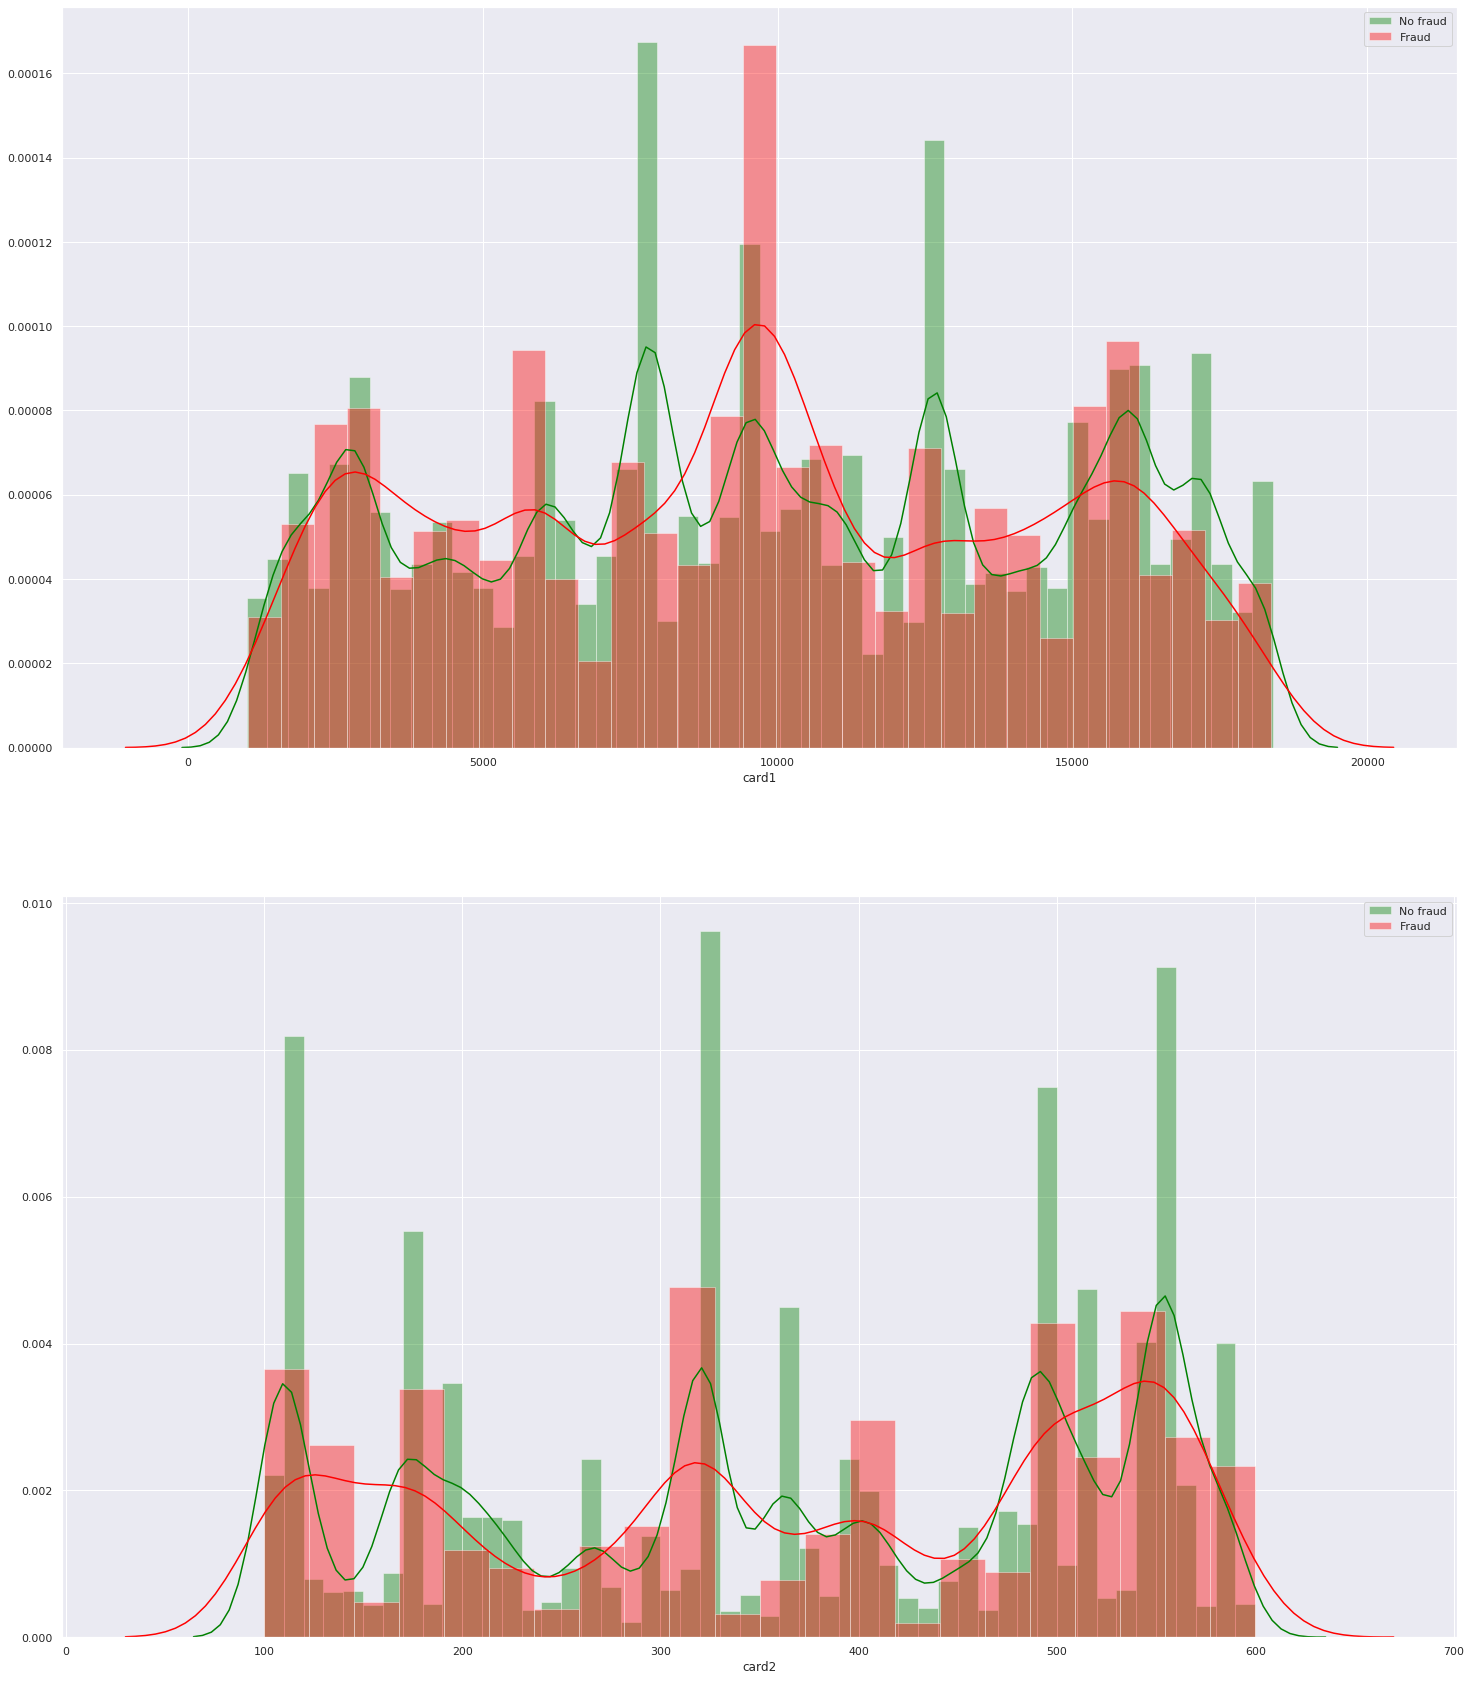

In [12]:
is_fraud = train_merge[train_merge['isFraud']==1]
no_fraud = train_merge[train_merge['isFraud']==0]

f, axes = plt.subplots(2, 1, figsize=(25, 30))

d1 = sns.distplot(no_fraud.card1, color="green", label="No fraud", ax=axes[0])
l1 = d1.legend()
c1 = sns.distplot(is_fraud.card1, color="red", label = "Fraud", ax=axes[0])
l2 = c1.legend()

d2 = sns.distplot(no_fraud.card2.dropna(), color="green", label="No fraud", ax=axes[1])
l3 = d2.legend()
c2 = sns.distplot(is_fraud.card2.dropna(), color="red",  label = "Fraud", ax=axes[1])
l4 = c2.legend()

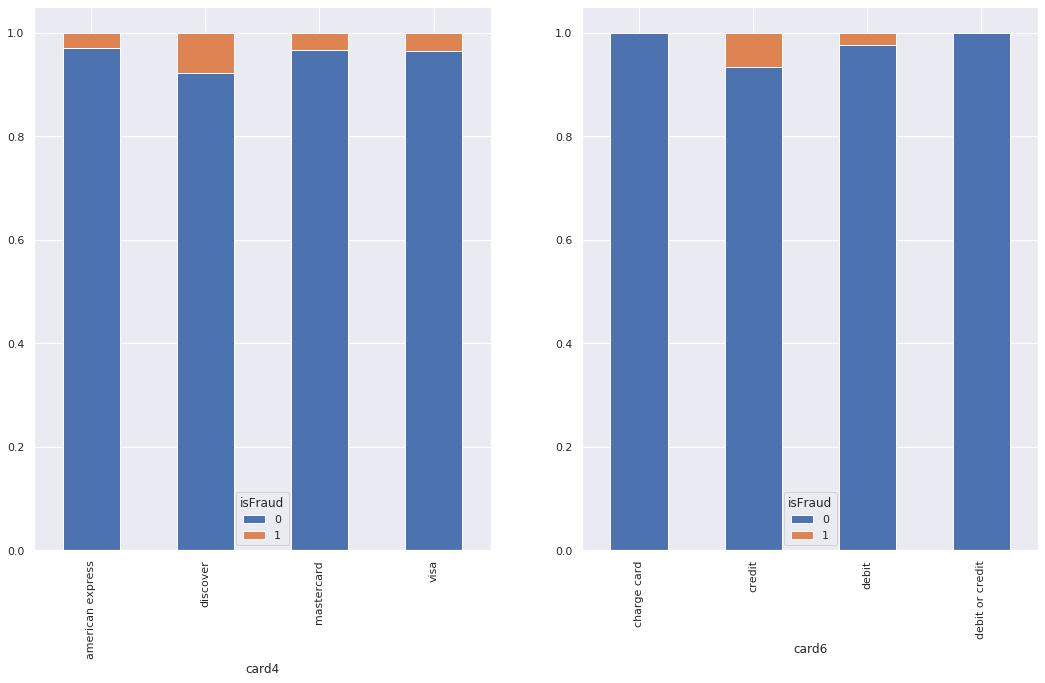

In [14]:
f, axes = plt.subplots(1, 2, figsize=(18, 10))

props = train_merge.groupby("card4")['isFraud'].value_counts(normalize=True).unstack()
p = props.plot(kind='bar', stacked='True', ax=axes[0])

props = train_merge.groupby("card6")['isFraud'].value_counts(normalize=True).unstack()
p = props.plot(kind='bar', stacked='True', ax=axes[1])

In [52]:
M = train_merge[['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9','isFraud']]

In [53]:
M.drop(columns=['M4'],inplace=True)
M.dropna(inplace=True)

In [54]:
columns=['M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']

In [63]:
M.replace({'F':1,'T':2},inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

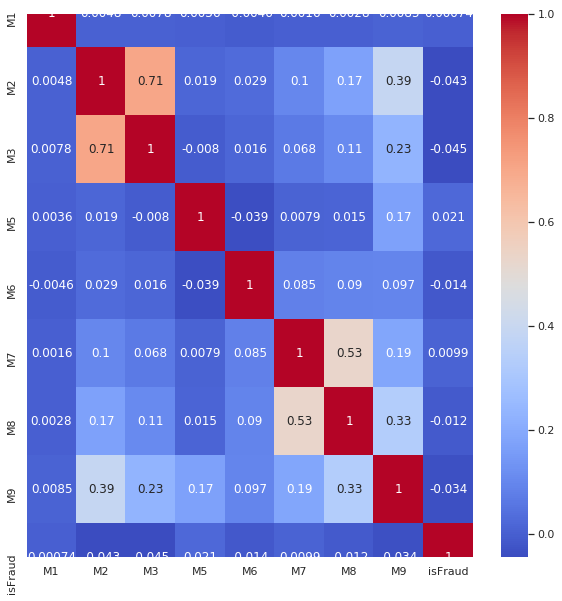

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(M.corr(),annot=True, cmap="coolwarm")
plt.title("Correlación de  cuando es fraude")

In [55]:
T=train_merge[['TransactionDT','isFraud']]

Text(0.5, 1.0, 'Boxplot con los tiempos de cada transaccion')

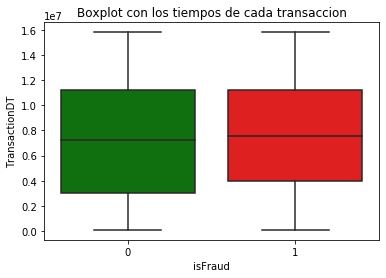

In [59]:
sns.boxplot(y=T.TransactionDT,x=T.isFraud,data=T, palette={0:'g',1:'r'})
plt.title("Boxplot con los tiempos de cada transaccion")

In [99]:
A = train_merge[['TransactionAmt','isFraud']]

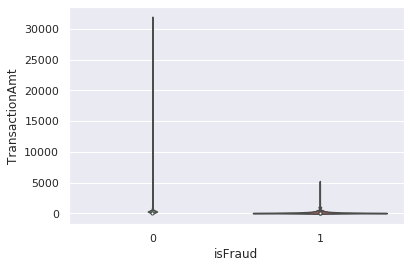

In [124]:
ax = sns.violinplot(x="isFraud", y="TransactionAmt", data=A,palette={0:'g',1:'r'})

In [120]:
A_1=A.loc[A['TransactionAmt']<1000]

Text(0.5, 1.0, 'Precios de transacciones según si fue fraude o no')

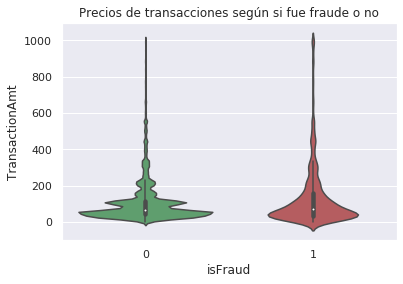

In [126]:
ax = sns.violinplot(x="isFraud", y="TransactionAmt", data=A_1,palette={0:'g',1:'r'})
plt.title("Precios de transacciones según si fue fraude o no")